# Data on spread of salary
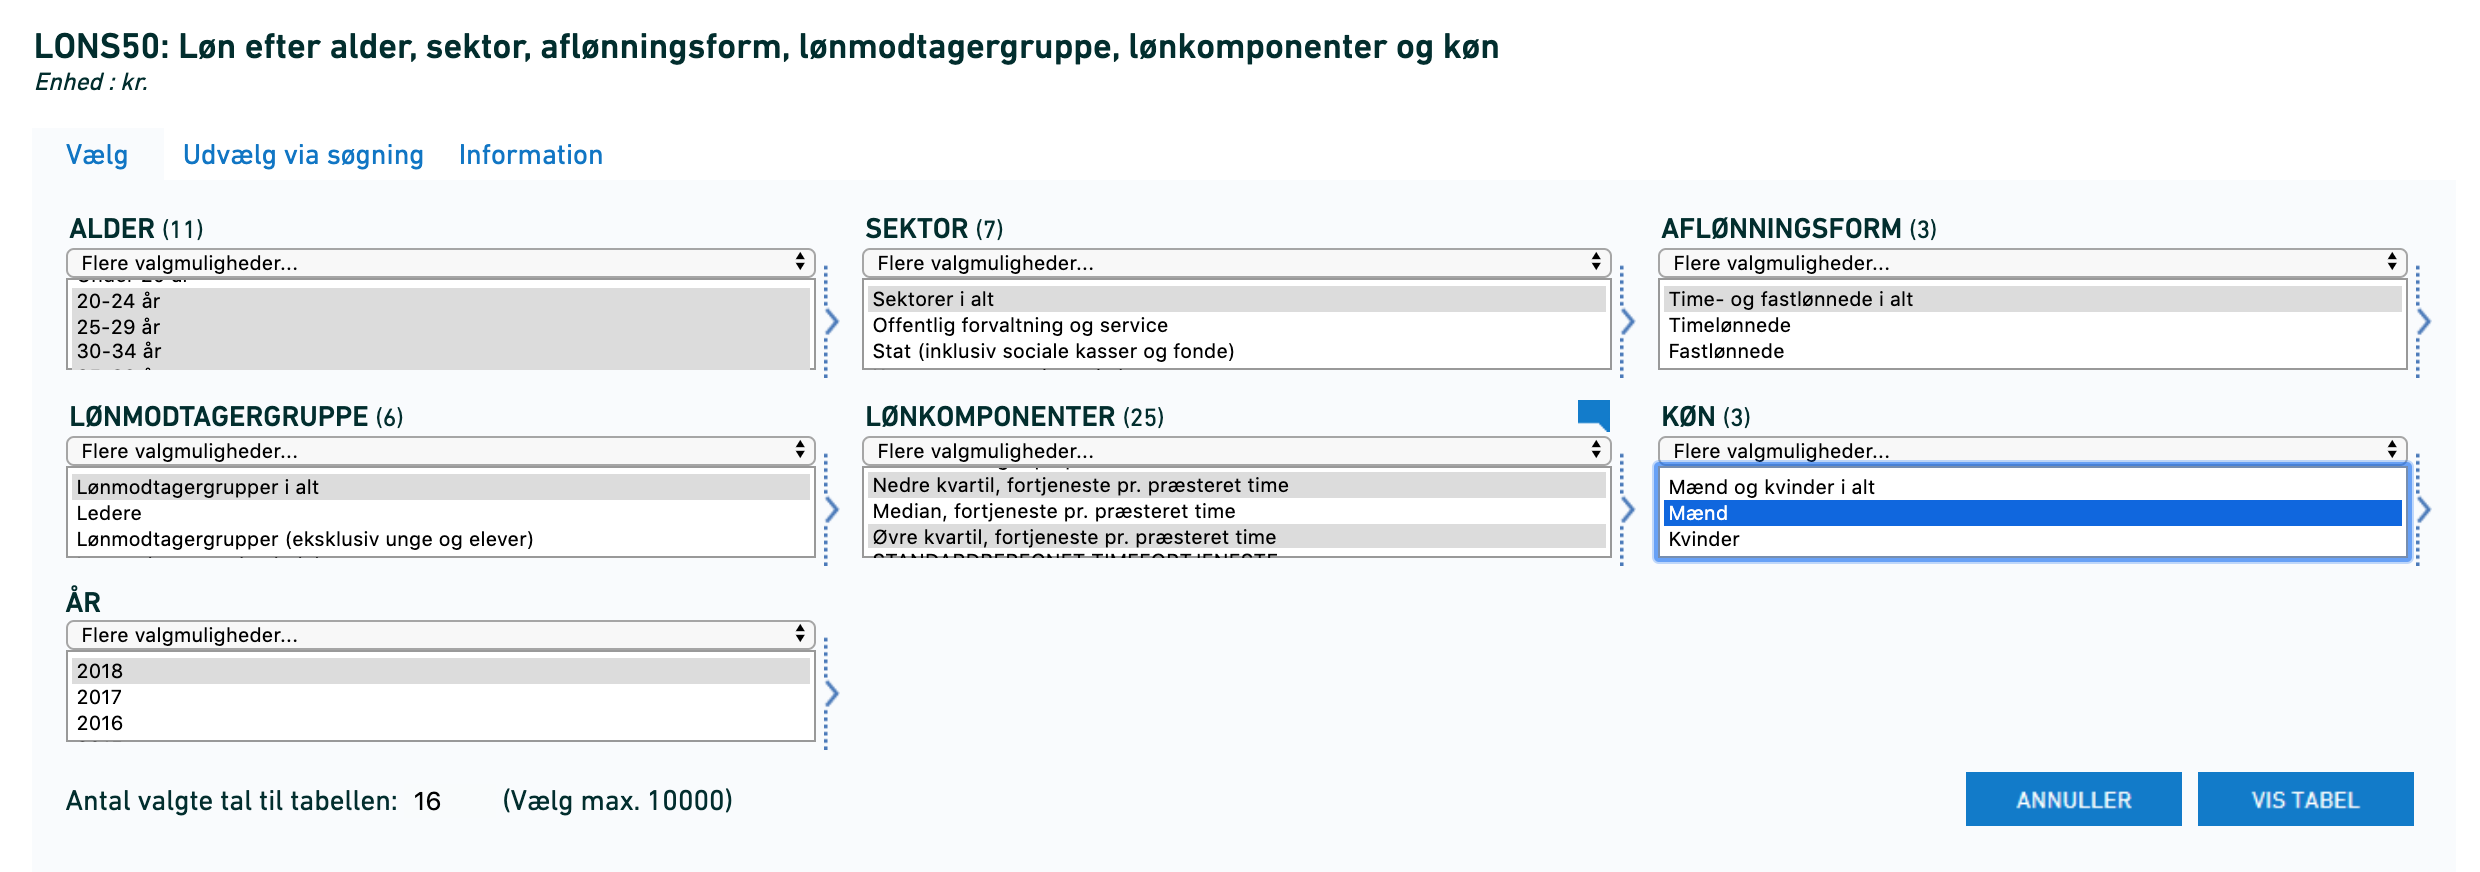

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df_men_raw = pd.read_csv('..//data//LONS_50_men_quartiles.csv', encoding='latin-1', sep=';', header=None)
df_men_raw.columns = ['gender', 'personal_group', 'payment', 'sectors', 'year', 'age', 'lower_quartile', 'upper_quartile']


In [60]:
df_women_raw = pd.read_csv('..//data//LONS_50_women_quartiles.csv', encoding='latin-1', sep=';', header=None)
df_women_raw.columns = ['gender', 'personal_group', 'payment', 'sectors', 'year', 'age', 'lower_quartile', 'upper_quartile']


In [61]:
df_men = df_men_raw[['age', 'lower_quartile', 'upper_quartile']]
df_women = df_women_raw[['age', 'lower_quartile', 'upper_quartile']]

In [66]:
def get_low_age(x):
    r = x.split('-')[0]
    return int(r)

def get_high_age(x):
    r = x.split('-')[1]
    v = r.split()[0]
    return int(v)
    
df_men['low_age'] = df_men['age'].apply(get_low_age)
df_men['high_age'] = df_men['age'].apply(get_high_age)
df_men['mean_age'] = df_men['low_age'] + df_men['high_age'] / 2

df_women['low_age'] = df_women['age'].apply(get_low_age)
df_women['high_age'] = df_women['age'].apply(get_high_age)
df_women['mean_age'] = df_women['low_age'] + df_women['high_age'] / 2

/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/

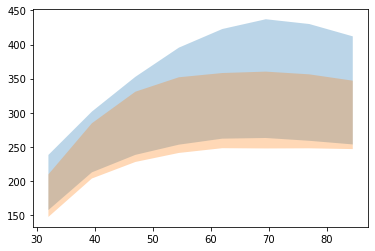

In [68]:



plt.fill_between(df_men['mean_age'], df_men['lower_quartile'], df_men['upper_quartile'], alpha=0.3)
plt.fill_between(df_women['mean_age'], df_women['lower_quartile'], df_women['upper_quartile'], alpha=0.3)


In [69]:
df_men.to_pickle('..//data//wage_quartiles_empirical_men.pkl)')

In [70]:
df_women.to_pickle('..//data//wage_quartiles_empirical_women.pkl)')